In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:



tripadvisor_df = pd.read_csv('restaurants_TripAdvisor.csv')


michelin_df = pd.read_csv('restaurant_Michelin_data.csv', sep=';')


print("TripAdvisor DataFrame:")

michelin_df['distinction'].fillna('Guide michelin', inplace=True)
tripadvisor_df.head(4)


TripAdvisor DataFrame:


,name,url,adress,phone,schedule,nb_reviews,global_rating,Food_rating,Service_rating,Value_rating,Atmosphere_rating,Meals_detail,FEATURES_detail,CUISINES_detail,Special Diets_detail,priceMin,priceMax
0,Agora,https://www.tripadvisor.in//Restaurant_Review-...,"19 Rue de la Boucherie, 56000, Vannes France",+33 2 97 61 50 90,Closed now:,891,4.5,4.5,4.5,4.5,4.5,"Lunch, Dinner","Highchairs Available, Wheelchair Accessible, F...",NaN,NaN,29.0,68.0
1,Comme A La Maison,https://www.tripadvisor.in//Restaurant_Review-...,"6 Place du General de Gaulle, 56000, Vannes Fr...",+33 2 97 54 16 64,Closed now:,127,5.0,5.0,5.0,5.0,4.5,NaN,NaN,"French, Healthy",Vegan Options,12.0,30.0
2,Le Moi de Mets,https://www.tripadvisor.in//Restaurant_Review-...,"19 Place Maurice Marchais, 56000, Vannes France",+33 2 97 47 17 29,Closed now:,189,5.0,5.0,5.0,4.5,4.5,"Lunch, Dinner",NaN,"French, European, Healthy",NaN,15.0,37.0
3,Bvan,https://www.tripadvisor.in//Restaurant_Review-...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
michelin_df.head(2)

,name,chef,cuisine,distinction
0,Ryoko - Comptoir A Ramen,NaN,Spécialité Ramen,Guide michelin
1,Bvan,NaN,Cuisine moderne,Guide michelin


In [27]:

tripadvisor_df['name'] = tripadvisor_df['name'].str.strip().str.lower()
michelin_df['name'] = michelin_df['name'].str.strip().str.lower()

merged_df = pd.merge(tripadvisor_df, michelin_df[['name', 'distinction']], how='left', on='name')


tripadvisor_df['star'] = merged_df['distinction']

tripadvisor_df['star'].fillna('Aucune distinction', inplace=True)


tripadvisor_df.head(2)


,name,url,adress,phone,schedule,nb_reviews,global_rating,Food_rating,Service_rating,Value_rating,Atmosphere_rating,Meals_detail,FEATURES_detail,CUISINES_detail,Special Diets_detail,priceMin,priceMax,star
0,agora,https://www.tripadvisor.in//Restaurant_Review-...,"19 Rue de la Boucherie, 56000, Vannes France",+33 2 97 61 50 90,Closed now:,891,4.5,4.5,4.5,4.5,4.5,"Lunch, Dinner","Highchairs Available, Wheelchair Accessible, F...",NaN,NaN,29.0,68.0,Aucune distinction
1,comme a la maison,https://www.tripadvisor.in//Restaurant_Review-...,"6 Place du General de Gaulle, 56000, Vannes Fr...",+33 2 97 54 16 64,Closed now:,127,5.0,5.0,5.0,5.0,4.5,NaN,NaN,"French, Healthy",Vegan Options,12.0,30.0,Aucune distinction


# Visualisation de répartition

<ipython-input-28-236188335a57>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=cuisines_df, order=cuisines_df.value_counts().index, palette='viridis')


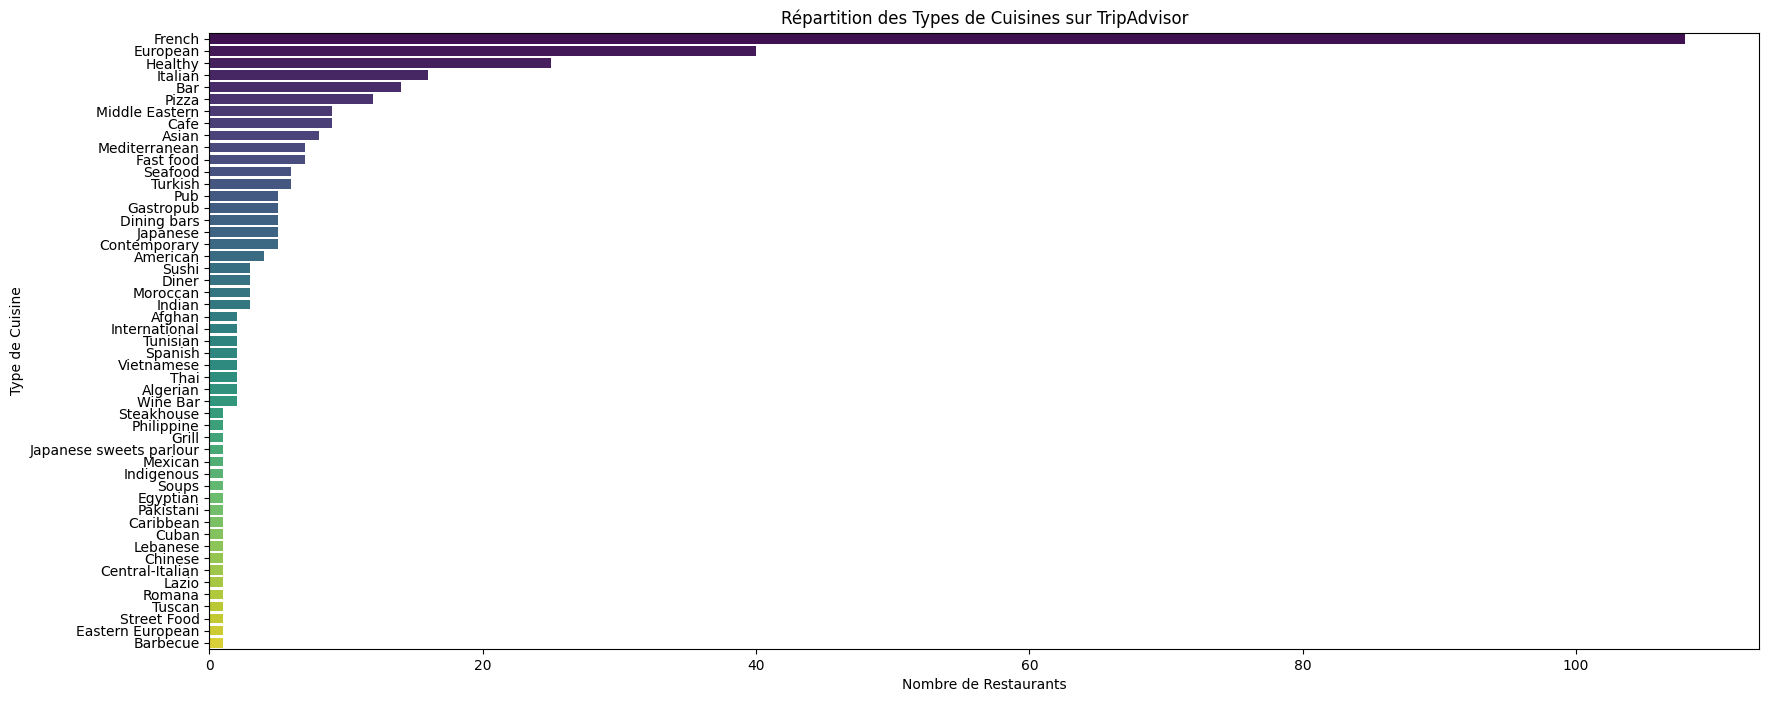

<ipython-input-28-236188335a57>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=cuisines_df, order=cuisines_df.value_counts().index, palette='viridis')


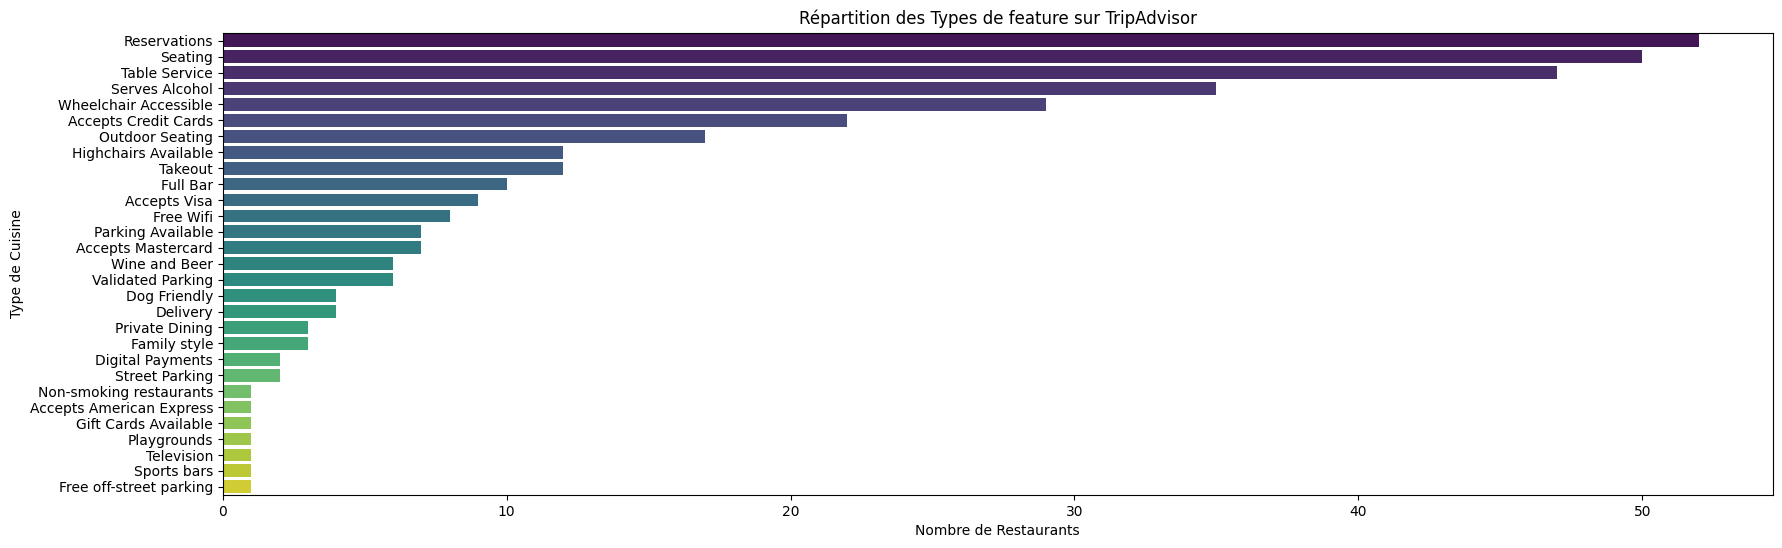

<ipython-input-28-236188335a57>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=cuisines_df, order=cuisines_df.value_counts().index, palette='viridis')


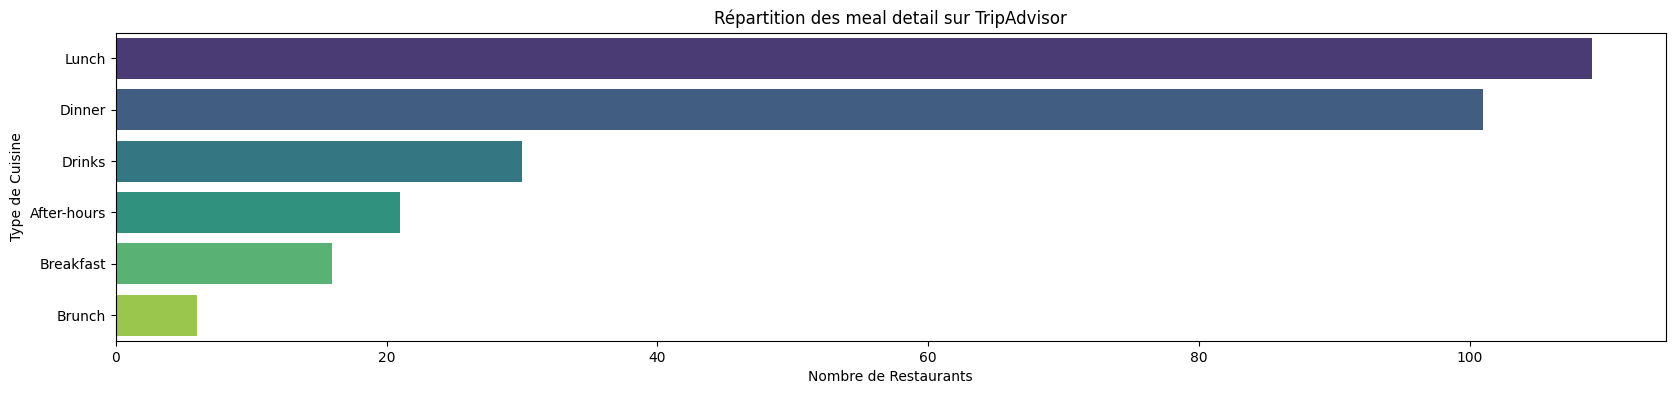

<ipython-input-28-236188335a57>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=cuisines_df, order=cuisines_df.value_counts().index, palette='viridis')


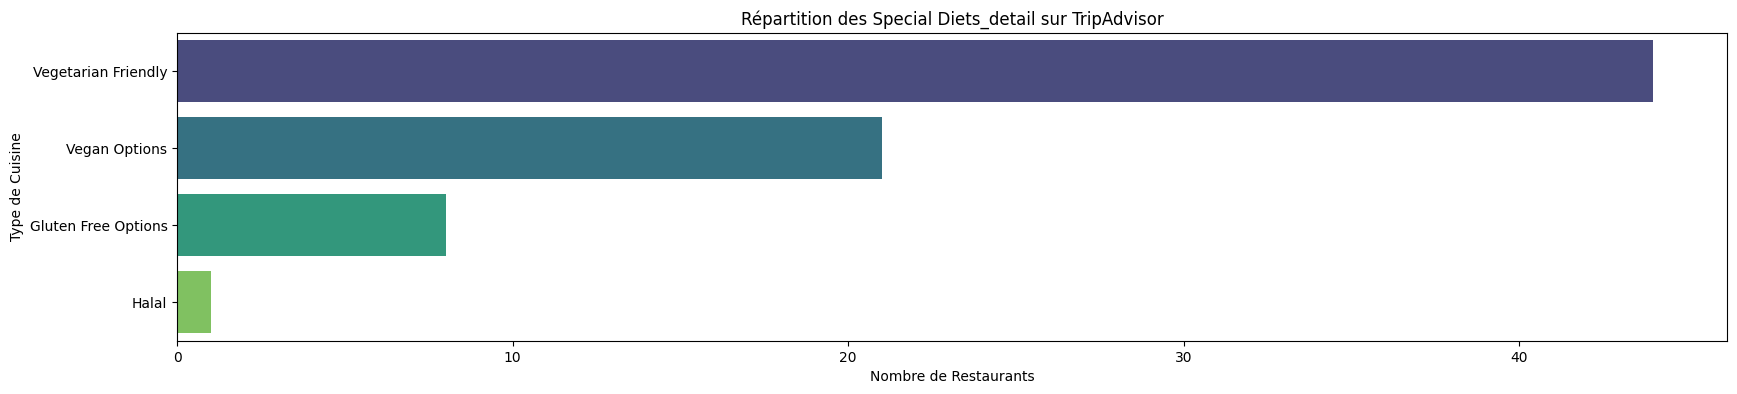

In [28]:

cuisines_df = tripadvisor_df['CUISINES_detail'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(20, 8))
sns.countplot(y=cuisines_df, order=cuisines_df.value_counts().index, palette='viridis')
plt.title('Répartition des Types de Cuisines sur TripAdvisor')
plt.xlabel('Nombre de Restaurants')
plt.ylabel('Type de Cuisine')
plt.show()

cuisines_df = tripadvisor_df['FEATURES_detail'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(20, 6))
sns.countplot(y=cuisines_df, order=cuisines_df.value_counts().index, palette='viridis')
plt.title('Répartition des Types de feature sur TripAdvisor')
plt.xlabel('Nombre de Restaurants')
plt.ylabel('Type de Cuisine')
plt.show()

cuisines_df = tripadvisor_df['Meals_detail'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(20, 4))
sns.countplot(y=cuisines_df, order=cuisines_df.value_counts().index, palette='viridis')
plt.title('Répartition des meal detail sur TripAdvisor')
plt.xlabel('Nombre de Restaurants')
plt.ylabel('Type de Cuisine')
plt.show()

cuisines_df = tripadvisor_df['Special Diets_detail'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(20, 4))
sns.countplot(y=cuisines_df, order=cuisines_df.value_counts().index, palette='viridis')
plt.title('Répartition des Special Diets_detail sur TripAdvisor')
plt.xlabel('Nombre de Restaurants')
plt.ylabel('Type de Cuisine')
plt.show()

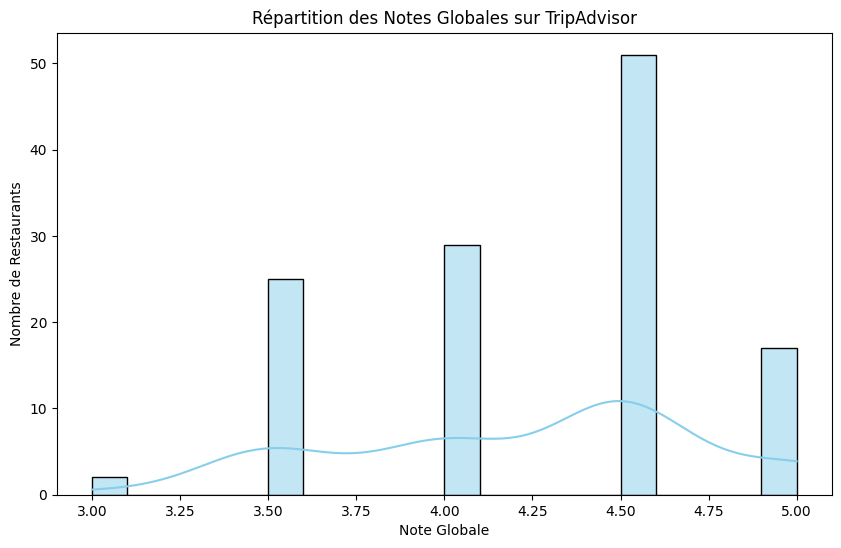

In [29]:

tripadvisor_df['global_rating'] = pd.to_numeric(tripadvisor_df['global_rating'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(tripadvisor_df['global_rating'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Répartition des Notes Globales sur TripAdvisor')
plt.xlabel('Note Globale')
plt.ylabel('Nombre de Restaurants')
plt.show()


In [30]:
!pip install geopandas

In [31]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

geolocator = Nominatim(user_agent="my_geocoder", timeout=20)

def get_location(row):
    try:
        location = geolocator.geocode(row['adress'])
        if location:
            return location.latitude, location.longitude
        else:
            return None
    except GeocoderTimedOut:
        return get_location(row)

tripadvisor_df[['latitude', 'longitude']] = tripadvisor_df.apply(get_location, axis=1, result_type='expand')

tripadvisor_df2 = tripadvisor_df
tripadvisor_df2.head(3)

,name,url,adress,phone,schedule,nb_reviews,global_rating,Food_rating,Service_rating,Value_rating,Atmosphere_rating,Meals_detail,FEATURES_detail,CUISINES_detail,Special Diets_detail,priceMin,priceMax,star,latitude,longitude
0,agora,https://www.tripadvisor.in//Restaurant_Review-...,"19 Rue de la Boucherie, 56000, Vannes France",+33 2 97 61 50 90,Closed now:,891,4.5,4.5,4.5,4.5,4.5,"Lunch, Dinner","Highchairs Available, Wheelchair Accessible, F...",NaN,NaN,29.0,68.0,Aucune distinction,47.659852,-2.758886
1,comme a la maison,https://www.tripadvisor.in//Restaurant_Review-...,"6 Place du General de Gaulle, 56000, Vannes Fr...",+33 2 97 54 16 64,Closed now:,127,5.0,5.0,5.0,5.0,4.5,NaN,NaN,"French, Healthy",Vegan Options,12.0,30.0,Aucune distinction,47.658614,-2.754278
2,le moi de mets,https://www.tripadvisor.in//Restaurant_Review-...,"19 Place Maurice Marchais, 56000, Vannes France",+33 2 97 47 17 29,Closed now:,189,5.0,5.0,5.0,4.5,4.5,"Lunch, Dinner",NaN,"French, European, Healthy",NaN,15.0,37.0,Aucune distinction,47.658049,-2.760928


In [32]:

nan_count_address = tripadvisor_df['adress'].isna().sum()
print(f"Nombre de NaN dans la colonne 'address': {nan_count_address}")


nan_count_latitude = tripadvisor_df['latitude'].isna().sum()
print(f"Nombre de NaN dans la colonne 'latitude': {nan_count_latitude}")


nan_count_longitude = tripadvisor_df['longitude'].isna().sum()
print(f"Nombre de NaN dans la colonne 'longitude': {nan_count_longitude}")


Nombre de NaN dans la colonne 'address': 49
Nombre de NaN dans la colonne 'latitude': 34
Nombre de NaN dans la colonne 'longitude': 34


In [33]:

null_address_not_null_lat_long = tripadvisor_df.loc[

    tripadvisor_df['latitude'].isna() &
    tripadvisor_df['longitude'].isna()
]

# Afficher le résultat
null_address_not_null_lat_long.head(3)


,name,url,adress,phone,schedule,nb_reviews,global_rating,Food_rating,Service_rating,Value_rating,Atmosphere_rating,Meals_detail,FEATURES_detail,CUISINES_detail,Special Diets_detail,priceMin,priceMax,star,latitude,longitude
4,le thika,https://www.tripadvisor.in//Restaurant_Review-...,"11 bis Rue Thomas de Closmadeuc, 56000, Vannes...",+33 2 97 69 67 54,Open now:,465,5.0,4.5,5.0,4.5,NaN,NaN,NaN,"French, Fast food, European, Eastern European,...",Vegetarian Friendly,8.0,14.0,Aucune distinction,NaN,NaN
8,la gourmandiere,https://www.tripadvisor.in//Restaurant_Review-...,"Rue du Poignant, 56000, Vannes France",+33 2 97 47 16 13,Open now:,563,4.5,4.5,4.5,4.5,4.0,"Lunch, Dinner",NaN,"French, European",NaN,55.0,75.0,1 star,NaN,NaN
9,la creperie sarra'zen,https://www.tripadvisor.in//Restaurant_Review-...,"21 rue Noe Place du Poids Public, 56000, Vanne...",+33 2 97 68 11 16,Closed now:,260,5.0,4.5,4.5,4.5,4.5,NaN,NaN,"French, European","Vegetarian Friendly, Vegan Options",10.0,20.0,Aucune distinction,NaN,NaN


In [34]:
import folium
import pandas as pd

def map_restaurants_by_rating(df, column_name, filter_value):

    filtered_restaurants = df[df[column_name] == filter_value]

    map_center = [filtered_restaurants['latitude'].dropna().iloc[0], filtered_restaurants['longitude'].dropna().iloc[0]]
    restaurant_map = folium.Map(location=map_center, zoom_start=14)

    for index, restaurant in filtered_restaurants.iterrows():
        if not pd.isnull(restaurant['latitude']) and not pd.isnull(restaurant['longitude']):
            folium.Marker([restaurant['latitude'], restaurant['longitude']], popup=restaurant['name']).add_to(restaurant_map)


    return restaurant_map

map_restaurants_by_rating(tripadvisor_df, 'global_rating', 4.5)


In [35]:
import folium
import pandas as pd

def map_restaurants_by_value(df, column_name, filter_value):

    filtered_restaurants = df[df[column_name].str.contains(filter_value, case=False, na=False)]


    filtered_restaurants = filtered_restaurants.dropna(subset=['latitude', 'longitude'])


    if not filtered_restaurants.empty:
        map_center = [filtered_restaurants['latitude'].iloc[0], filtered_restaurants['longitude'].iloc[0]]
        restaurant_map = folium.Map(location=map_center, zoom_start=14)

        for index, restaurant in filtered_restaurants.iterrows():
            folium.Marker([restaurant['latitude'], restaurant['longitude']], popup=restaurant['name']).add_to(restaurant_map)


        return restaurant_map
    else:
        return None


map_restaurants_by_value(tripadvisor_df, 'Special Diets_detail', 'Vegan Options')


In [41]:
import folium

def map_selected_restaurants_by_id(df, selected_ids):
    selected_restaurants = df[df['id'].isin(selected_ids)]
    selected_restaurants = selected_restaurants.dropna(subset=['latitude', 'longitude'])

    if not selected_restaurants.empty:
        map_center = [selected_restaurants['latitude'].iloc[0], selected_restaurants['longitude'].iloc[0]]
        restaurant_map = folium.Map(location=map_center, zoom_start=16)

        colors = ['red', 'blue', 'green']
        for i, (index, restaurant) in enumerate(selected_restaurants.iterrows()):
            folium.Marker(
                [restaurant['latitude'], restaurant['longitude']],
                popup=restaurant['name'],
                icon=folium.Icon(color=colors[i]),
            ).add_to(restaurant_map)

        legend_html = """
            <div style="position: fixed; top: 200px; left: 50%; transform: translateX(-50%); background-color: white; padding: 10px; border-radius: 5px; box-shadow: 0px 0px 10px 0px #000000; z-index: 1000; font-size: 14px;">
                {}
            </div>
        """.format(
            "<br>".join(
                f'<span style="color: {colors[i % len(colors)]};">{name} (Rating: {rating})</span>'
                for i, (name, rating) in enumerate(zip(selected_restaurants['name'], selected_restaurants['global_rating']))
            )
        )

        restaurant_map.get_root().html.add_child(folium.Element(legend_html))

        return restaurant_map
    else:
        return None


# Example of usage with 3 specific ids
selected_ids = [1, 2, 3]  # Replace with your desired ids
map_selected_restaurants_by_id(tripadvisor_df, selected_ids)


<ipython-input-37-d6fff8aa64f5>:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, pad=0.01, fraction=0.02)


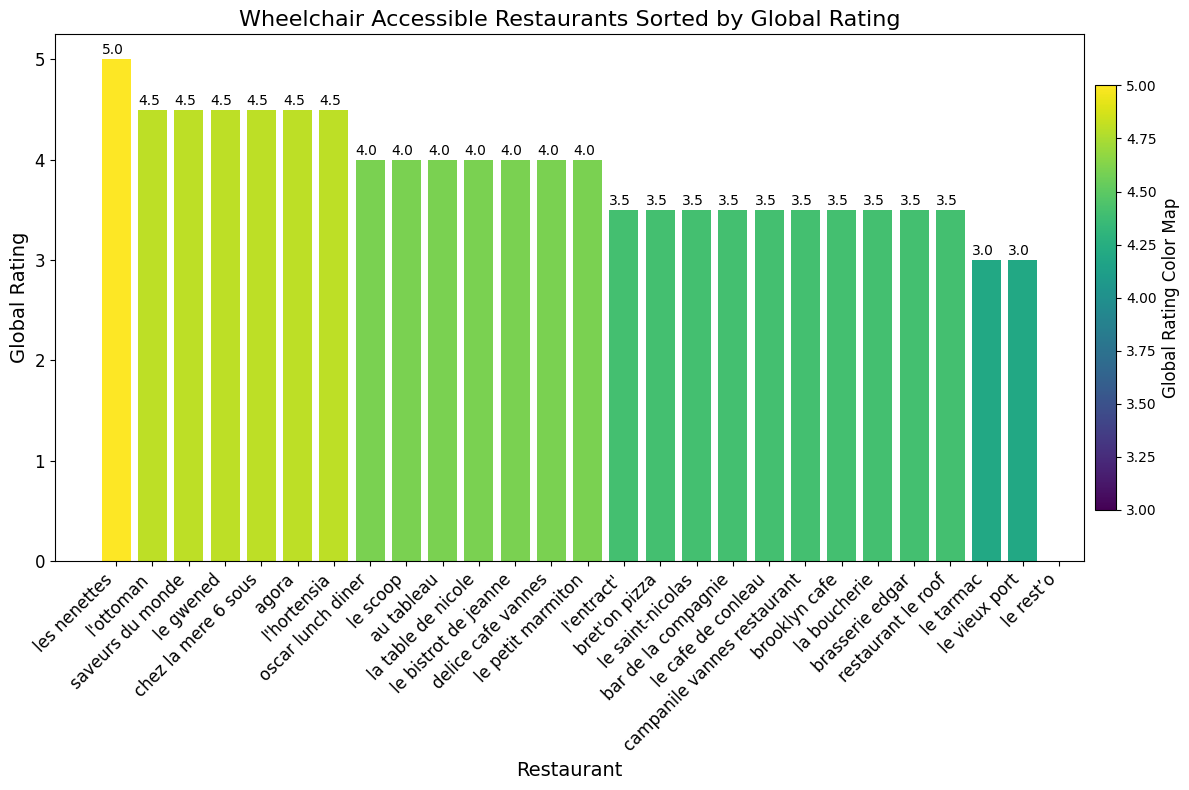

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_wheelchair_accessible_restaurants(df):
    wheelchair_accessible_df = df[df['FEATURES_detail'].str.contains('Wheelchair Accessible', case=False, na=False)]

    sorted_df = wheelchair_accessible_df.sort_values(by='global_rating', ascending=False)


    plt.figure(figsize=(12, 8))
    colors = plt.cm.viridis(sorted_df['global_rating'] / max(sorted_df['global_rating']))  # Couleurs basées sur la note globale
    bars = plt.bar(sorted_df['name'], sorted_df['global_rating'], color=colors)


    plt.xlabel('Restaurant', fontsize=14)
    plt.ylabel('Global Rating', fontsize=14)
    plt.title('Wheelchair Accessible Restaurants Sorted by Global Rating', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    for bar, rating in zip(bars, sorted_df['global_rating']):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05,
                 f'{rating:.1f}', fontsize=10, color='black', ha='center')


    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(sorted_df['global_rating']), vmax=max(sorted_df['global_rating'])))
    sm._A = []  # Pour éviter une erreur lors de la création de la légende
    cbar = plt.colorbar(sm, pad=0.01, fraction=0.02)
    cbar.set_label('Global Rating Color Map', fontsize=12)

    plt.tight_layout()
    plt.show()

plot_wheelchair_accessible_restaurants(tripadvisor_df)

<ipython-input-38-3500b7cb76bd>:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, pad=0.01, fraction=0.02)


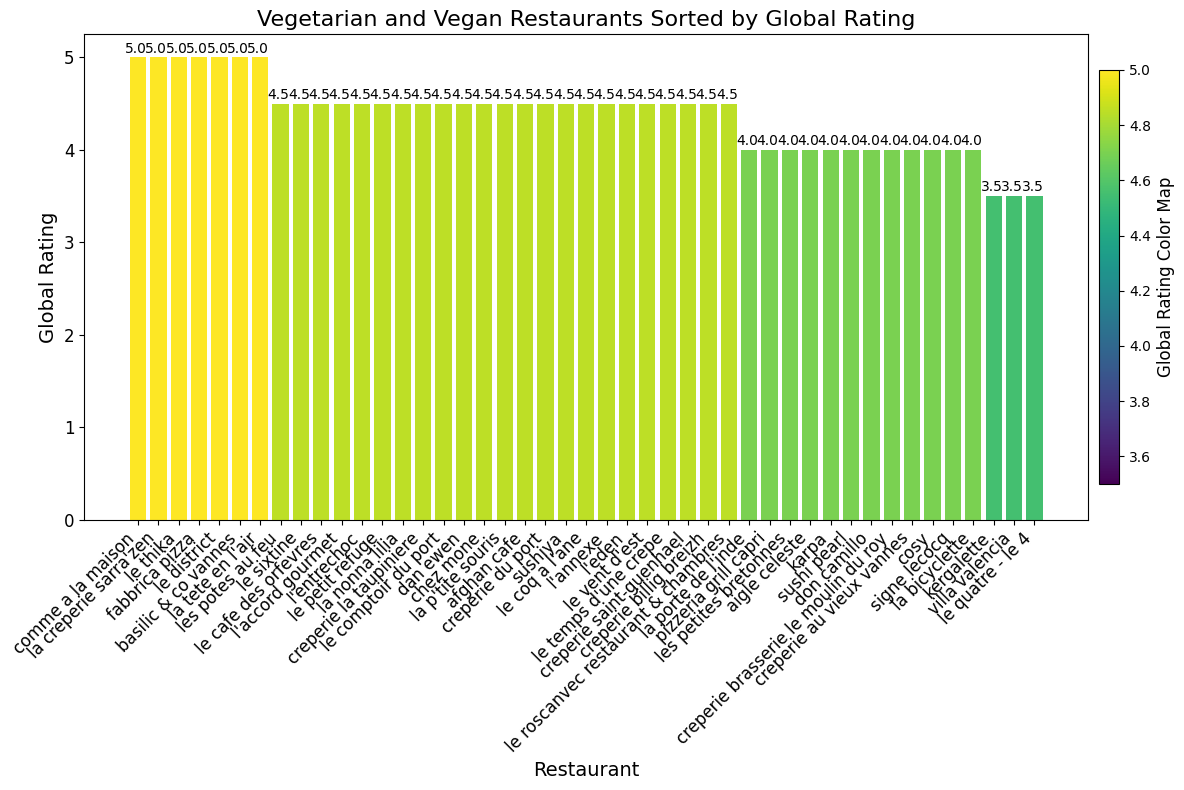

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_vegetarian_vegan_restaurants(df):

    veg_df = df[df['Special Diets_detail'].str.contains('Vegetarian Friendly|Vegan Options', case=False, na=False)]


    sorted_df = veg_df.sort_values(by='global_rating', ascending=False)


    plt.figure(figsize=(12, 8))
    colors = plt.cm.viridis(sorted_df['global_rating'] / max(sorted_df['global_rating']))  # Couleurs basées sur la note globale
    bars = plt.bar(sorted_df['name'], sorted_df['global_rating'], color=colors)

    plt.xlabel('Restaurant', fontsize=14)
    plt.ylabel('Global Rating', fontsize=14)
    plt.title('Vegetarian and Vegan Restaurants Sorted by Global Rating', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)


    for bar, rating in zip(bars, sorted_df['global_rating']):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05,
                 f'{rating:.1f}', fontsize=10, color='black', ha='center')


    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(sorted_df['global_rating']), vmax=max(sorted_df['global_rating'])))
    sm._A = []  # Pour éviter une erreur lors de la création de la légende
    cbar = plt.colorbar(sm, pad=0.01, fraction=0.02)
    cbar.set_label('Global Rating Color Map', fontsize=12)

    plt.tight_layout()
    plt.show()


plot_vegetarian_vegan_restaurants(tripadvisor_df)


In [39]:

tripadvisor_df['id'] = tripadvisor_df.index + 1



In [40]:
tripadvisor_df

,name,url,adress,phone,schedule,nb_reviews,global_rating,Food_rating,Service_rating,Value_rating,...,Meals_detail,FEATURES_detail,CUISINES_detail,Special Diets_detail,priceMin,priceMax,star,latitude,longitude,id
0,agora,https://www.tripadvisor.in//Restaurant_Review-...,"19 Rue de la Boucherie, 56000, Vannes France",+33 2 97 61 50 90,Closed now:,891,4.5,4.5,4.5,4.5,...,"Lunch, Dinner","Highchairs Available, Wheelchair Accessible, F...",NaN,NaN,29.0,68.0,Aucune distinction,47.659852,-2.758886,1
1,comme a la maison,https://www.tripadvisor.in//Restaurant_Review-...,"6 Place du General de Gaulle, 56000, Vannes Fr...",+33 2 97 54 16 64,Closed now:,127,5.0,5.0,5.0,5.0,...,NaN,NaN,"French, Healthy",Vegan Options,12.0,30.0,Aucune distinction,47.658614,-2.754278,2
2,le moi de mets,https://www.tripadvisor.in//Restaurant_Review-...,"19 Place Maurice Marchais, 56000, Vannes France",+33 2 97 47 17 29,Closed now:,189,5.0,5.0,5.0,4.5,...,"Lunch, Dinner",NaN,"French, European, Healthy",NaN,15.0,37.0,Aucune distinction,47.658049,-2.760928,3
3,bvan,https://www.tripadvisor.in//Restaurant_Review-...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Guide michelin,46.314475,11.048029,4
4,le thika,https://www.tripadvisor.in//Restaurant_Review-...,"11 bis Rue Thomas de Closmadeuc, 56000, Vannes...",+33 2 97 69 67 54,Open now:,465,5.0,4.5,5.0,4.5,...,NaN,NaN,"French, Fast food, European, Eastern European,...",Vegetarian Friendly,8.0,14.0,Aucune distinction,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,kusmi tea | vannes,https://www.tripadvisor.in//Restaurant_Review-...,"13 rue Saint Vincent, 56000, Vannes France",+33 2-97-44-53-79,Open now:,0,NaN,NaN,NaN,NaN,...,"Lunch, Dinner",NaN,NaN,NaN,NaN,NaN,Aucune distinction,47.763914,-2.135096,216
216,francois kouign amann - crepes - gateaux breton,https://www.tripadvisor.in//Restaurant_Review-...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Aucune distinction,46.314475,11.048029,217
217,ty vira,https://www.tripadvisor.in//Restaurant_Review-...,"11 rue Thiers, 56000, Vannes France",+33 7 86 17 95 71,Closed now:,0,NaN,NaN,NaN,NaN,...,"Lunch, Dinner, Drinks",NaN,"European, Asian",NaN,NaN,NaN,Aucune distinction,47.656437,-2.759698,218
218,les charmettes quelneuc,https://www.tripadvisor.in//Restaurant_Review-...,"Le Bourg, 56910 Quelneuc, Vannes France",+33 2 99 93 79 75,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,French,NaN,NaN,NaN,Aucune distinction,NaN,NaN,219


In [ ]:

tripadvisor_df.to_csv('tripadvisor_with_id.csv', index=False)
